In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [358]:
data = pd.read_csv("housing.csv",sep=",")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


1) Drop “ocean_proximity”

In [359]:
df = data.drop(columns = ['ocean_proximity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


2) Replace null value in “total_bedroom” with mean of “total_bedroom”

In [360]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [361]:
mean = df.mean()['total_bedrooms']
df['total_bedrooms'] = np.where(df['total_bedrooms'].isnull(), mean, df['total_bedrooms'])
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [362]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

3) Split data into train set (70%) and test set (30%) by using random_state = the numbers between
your 6th-8th position of your ID number (e.g. ID= 6362031026 => random_state = 310)

In [363]:
X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [364]:
#split data train 70% test 30% and build linear regression model (ID = 6380035026)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 350)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))


14448 6192
14448 6192


In [365]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19577,-120.75,37.69,24.0,2282.0,423.0,1167.0,398.0,3.8214
15853,-122.43,37.74,52.0,1514.0,314.0,724.0,301.0,5.3292
2359,-119.63,36.76,22.0,4126.0,614.0,1795.0,613.0,4.9250
9985,-122.57,38.58,18.0,2083.0,506.0,926.0,487.0,1.9925
7201,-118.18,34.02,36.0,1138.0,296.0,1484.0,320.0,2.2813


In [366]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11903,-117.38,33.97,30.0,2953.0,703.0,1406.0,580.0,2.6895
8166,-118.13,33.80,36.0,1496.0,271.0,743.0,265.0,4.4312
9869,-121.84,36.61,21.0,2876.0,802.0,2487.0,795.0,2.2007
790,-122.08,37.64,36.0,1340.0,245.0,789.0,248.0,3.8000
223,-122.20,37.80,52.0,1547.0,293.0,706.0,268.0,4.7721


4) Fit a linear regression

In [367]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
# fit our train dataset to it
regressor.fit(X_train, y_train)


print("intecept:",regressor.intercept_)

pd.DataFrame(data = regressor.coef_, index= X_train.columns, columns = ['Coef'])

intecept: -3610081.506646652


,Coef
longitude,-43029.492383
latitude,-42837.919383
housing_median_age,1157.085827
total_rooms,-7.303054
total_bedrooms,94.902414
population,-36.743141
households,60.330095
median_income,40183.741637


a. yhat = 
-3610081 - 43029.49[longitude] - 42837.92[latitude] + 1157.09[housing_median_age]  - 7.3[total_rooms] + 94.9[total_bedrooms]  -36.7[population] + 60.3[households] + 40183.7[median_income]

b. Interpret the coefficients for “housing_median_age” and “median_income”

housing_median_age has positive impact on the housing price, implying that the higher average of housing_median_age is, the higher housing price will be. Coeff = 1157.09 => as the average of housing_median_age increase 1 unit, the average housing price will increase around 1157.09 dollar holding on the the other features constant.

median_income has positive impact on the housing price, implying that the higher average of median_incomee is, the higher housing price will be. Coeff = 40183.7 => as the average of median_income increase 1 unit, the average housing price will increase around 40183.7(x 10000 US Dollars)  holding on the the other features constant.

c. Predict a housing price for a house with longtitude=-200, latitude=40, housing_median_age=10, total_rooms=1500, total_bedrooms = 400, population=1000, households = 500, and median_income = 3.5

In [368]:
price = pd.DataFrame({
    "longtitude" : [-200], 
    "latitude" : [40], 
    "housing_median_age" : [10], 
    "total_rooms" : [1500], 
    "total_bedrooms" : [400], 
    "population" : [1000], 
    "households" : [500],
    "median_income" : [3.5]})

regressor.predict(price)

array([3454942.43969533])

d. Evaluate a linear regression model performance

In [369]:
#Calculate R squared:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.3f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.632


In [370]:
#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
reg_rmse = np.sqrt(mse)
print("RMSE:", reg_rmse)

RMSE: 69762.07576644463


In [371]:
#MAE
from sklearn.metrics import mean_absolute_error
reg_mae = mean_absolute_error(y_test, y_pred)
print("MAE:", reg_mae)

MAE: 50858.42397390557


We find that our model has an accuracy of around "63.2%" , MSE around "69762" and MSE around "50858" by using linear regression

5) Using other regression techniques to predict a house price

In [372]:
#Lasso
from sklearn.linear_model import Lasso

lasso_model = Lasso(normalize=True, random_state = 350)
lasso_model.fit(X_train, y_train)

print("Lasso_intercept")
print(lasso_model.intercept_)

print("======================")
print("Lasso_Coefficient")
print(lasso_model.coef_)

Lasso_intercept
-3553874.7696735375
Lasso_Coefficient
[-4.23915565e+04 -4.22550347e+04  1.16325051e+03 -6.33798551e+00
  9.04171550e+01 -3.60111007e+01  5.79338334e+01  3.99639715e+04]


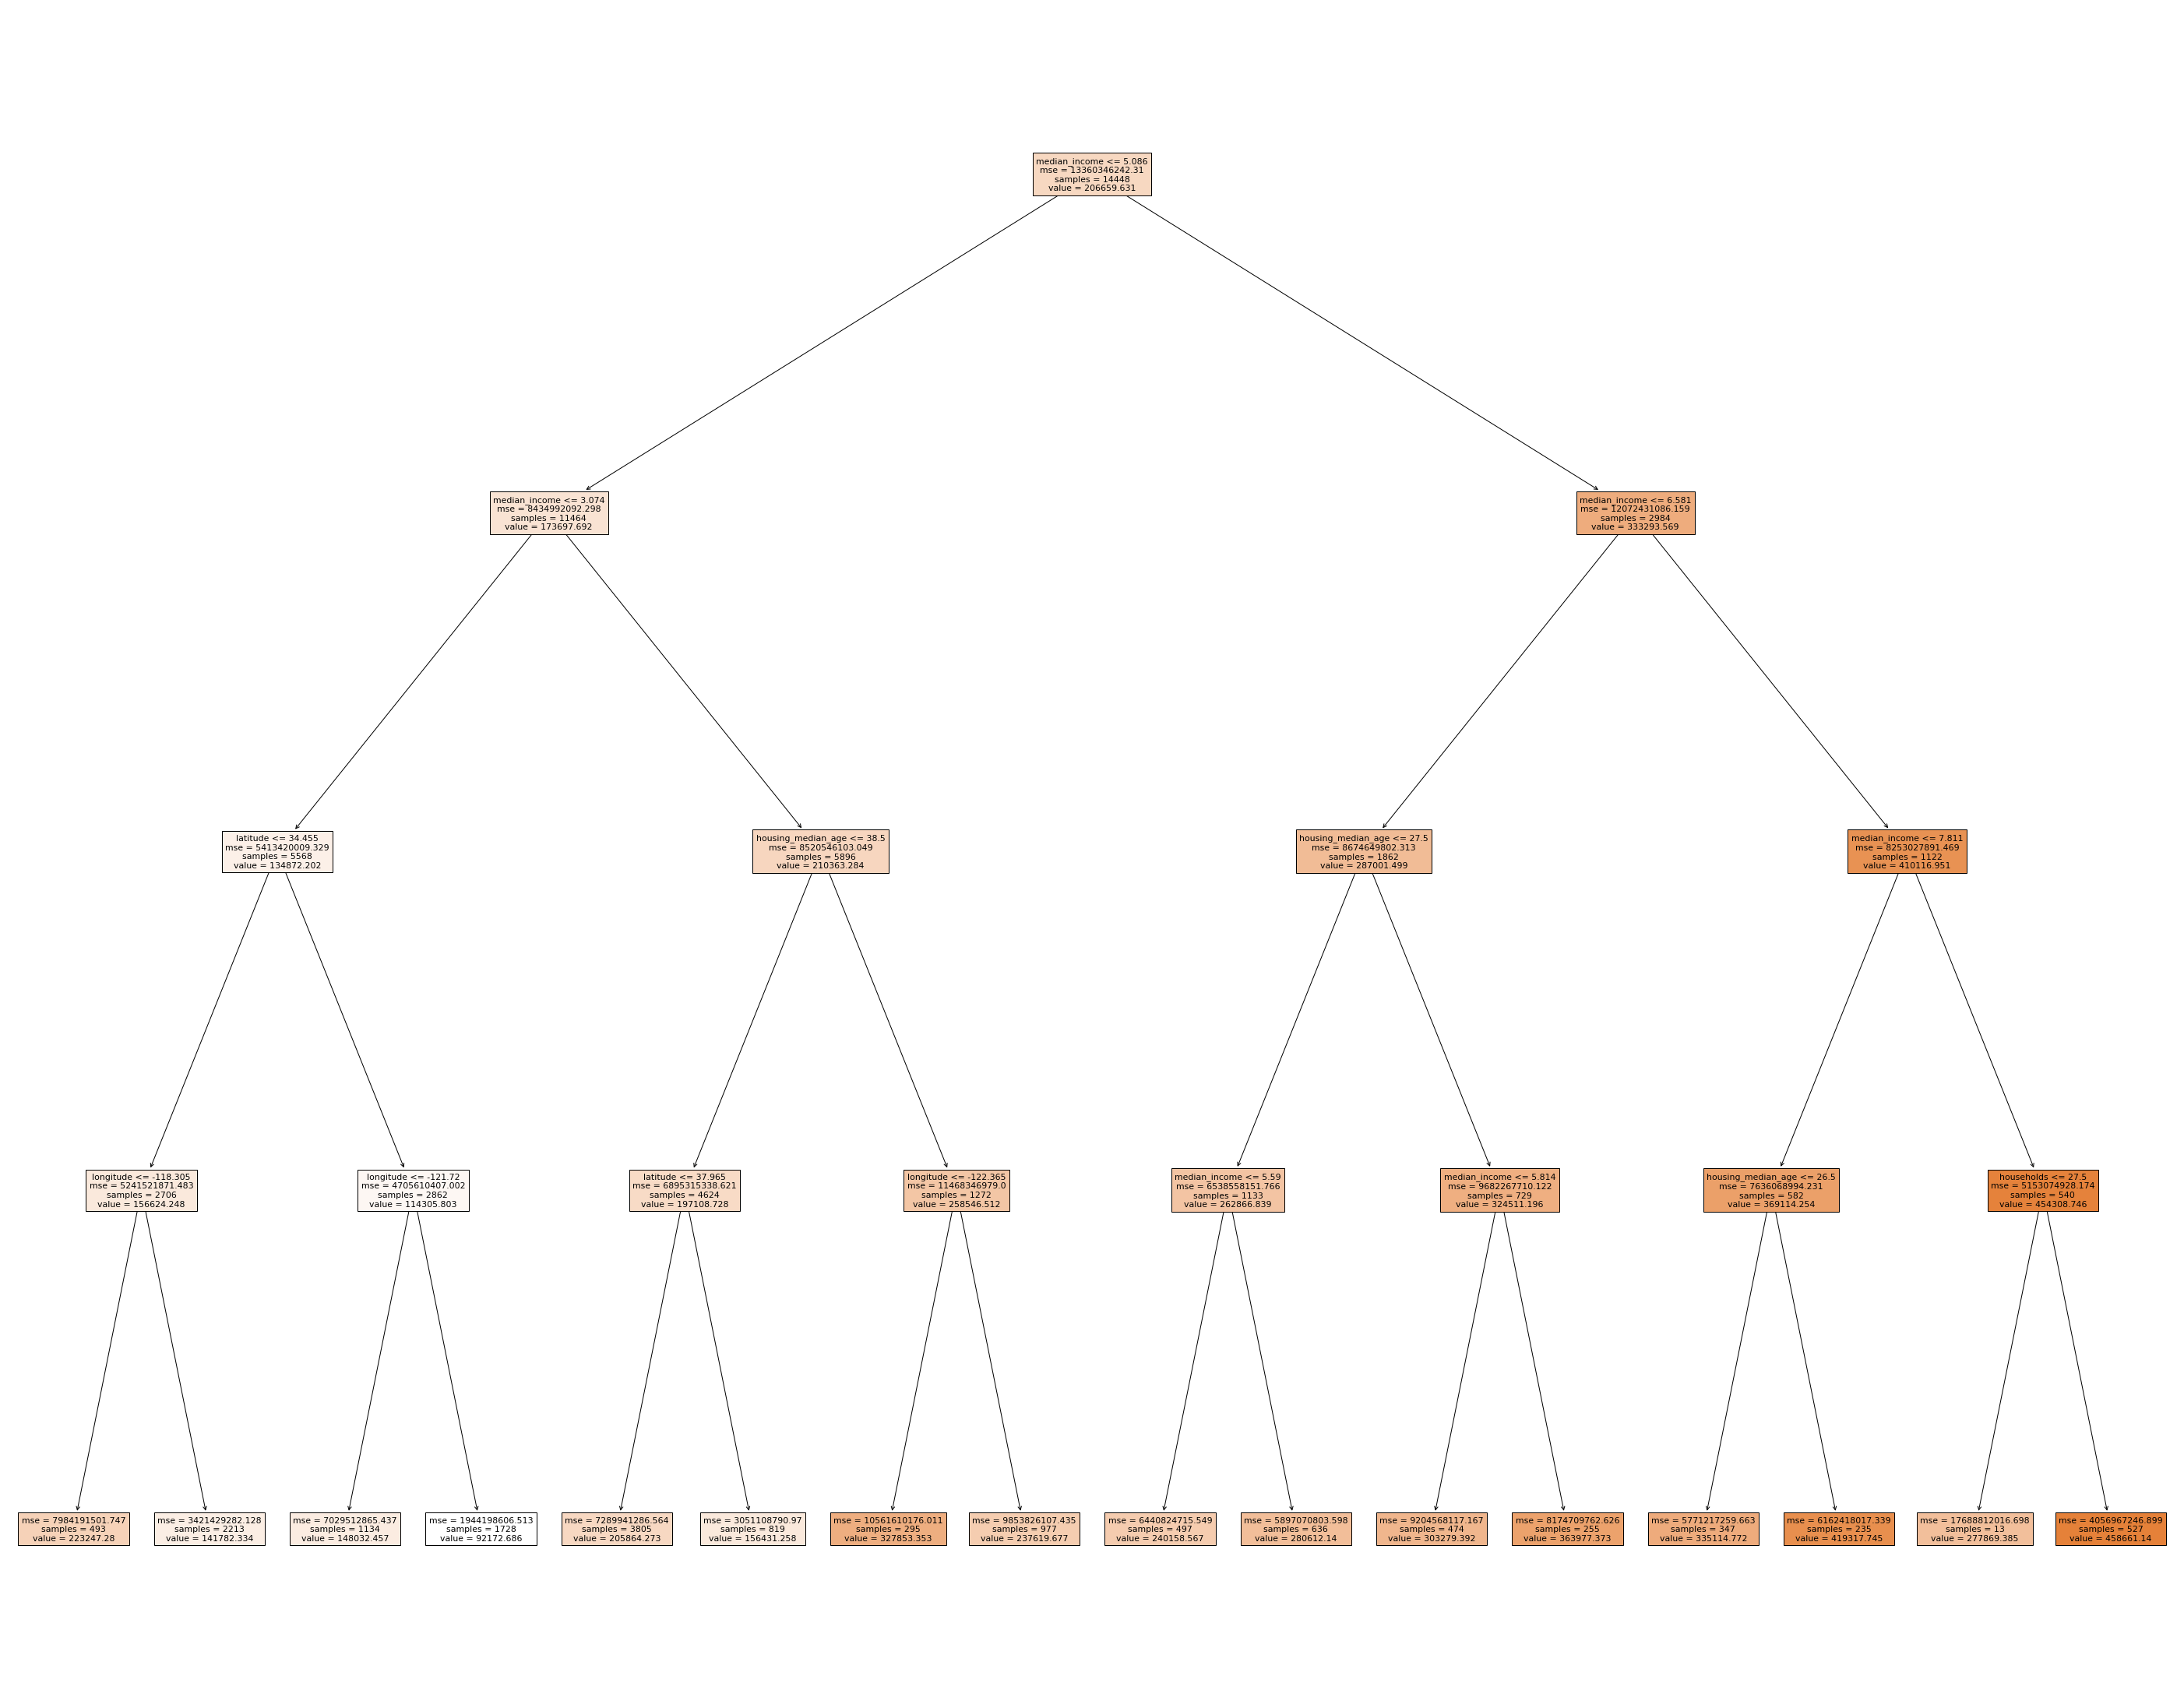

In [373]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

max_tree_model = DecisionTreeRegressor(max_depth = 4)
max_tree_model.fit(X_train, y_train)

#Plot tree
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (50,40))
feats = list(X_train.columns)
_=tree.plot_tree(max_tree_model, feature_names=feats, filled= True)

In [374]:
#RandomForest

from sklearn.ensemble import RandomForestRegressor

max_forest_model = RandomForestRegressor(max_depth = 4)
max_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4)

a. Predict a housing price for a house with longtitude=-200, latitude=40,
housing_median_age=10, total_rooms=1500, total_bedrooms = 400, population=1000,
households = 500, and median_income = 3.5

In [375]:
print("===============================================")
print("Lasso_Price", lasso_model.predict(price))

print("===============================================")
print("DecisionTree_Price", max_tree_model.predict(price))

print("===============================================")
print("RandomForest_Price", max_forest_model.predict(price))

Lasso_Price [3405357.25009812]
DecisionTree_Price [156431.25763126]
RandomForest_Price [166403.68576231]


b. Evaluate model performance and compare the model’s performance with a linear
regression model

In [376]:
ylasso_pred = lasso_model.predict(X_test)
yDT_pred = max_tree_model.predict(X_test)
yRT_pred = max_forest_model.predict(X_test)

In [377]:
#Calculate R squared:
print('Linear R squared": %.3f' % regressor.score(X_test, y_test))
print('Lasso R squared: %.3f' % lasso_model.score(X_test, y_test))
print('DecisionTree R squared: %.3f' % max_tree_model.score(X_test, y_test))
print('RandomForest_Price R squared: %.3f' % max_forest_model.score(X_test, y_test))

Linear R squared": 0.632
Lasso R squared: 0.631
DecisionTree R squared: 0.541
RandomForest_Price R squared: 0.569


In [378]:
#MSE
Lasso_RMSE = np.sqrt(mean_squared_error(y_test, ylasso_pred))
DecisionTree_RMSE = np.sqrt(mean_squared_error(y_test, yDT_pred))
RandomForest_RMSE = np.sqrt(mean_squared_error(y_test, yRT_pred))
print("Linear RMSE: %.3f" % reg_rmse)
print("Lasso RMSE: %.3f" % Lasso_RMSE)
print("DecisionTree RMSE: %.3f" % DecisionTree_RMSE)
print("RandomForest RMSE: %.3f" % RandomForest_RMSE)

Linear RMSE: 69762.076
Lasso RMSE: 69775.178
DecisionTree RMSE: 77904.595
RandomForest RMSE: 75427.133


In [379]:
#MAE
Lasso_MAE = mean_absolute_error(y_test, ylasso_pred)
DecisionTree_MAE = mean_absolute_error(y_test, yDT_pred)
RandomForest_MAE = mean_absolute_error(y_test, yRT_pred)

print("Linear MAE : %.3f" % reg_mae)
print("Lasso MAE : %.3f" %Lasso_MAE)
print("DecisionTree MAE : %.3f" %DecisionTree_MAE)
print("RandomForest MAE : %.3f" %RandomForest_MAE)

Linear MAE : 50858.424
Lasso MAE : 50868.039
DecisionTree MAE : 57464.487
RandomForest MAE : 55244.421


From above answer, Linear and Lasso fitted model well.

6) Create any feature(s) to improve your model and report your model’s performance

In [385]:
dfnew = df
dfnew['price_per_total_rooms'] = dfnew['median_house_value']/dfnew['total_rooms']
dfnew.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,price_per_total_bedrooms,price_per_total_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,514.318182,514.318182
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,50.500070,50.500070
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,240.013633,240.013633
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,267.896389,267.896389
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,210.325753,210.325753


In [386]:
Xnew = dfnew.drop('median_house_value', axis = 1)
ynew = np.log(dfnew['median_house_value'])

#split data train 70% test 30% and build linear regression model (ID = 6380035026)
Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(Xnew, ynew, test_size=0.3, random_state= 350)

print(len(Xnew_train), len(Xnew_test))
print(len(ynew_train), len(ynew_test))

14448 6192
14448 6192


In [387]:
linear = LinearRegression(normalize=True)
# fit our train dataset to it
linear.fit(Xnew_train, ynew_train)

LinearRegression(normalize=True)

In [388]:
print('Linear Regression R squared": %.3f' % linear.score(Xnew_test, ynew_test))

Linear Regression R squared": 0.640


We find that new model has an accuracy around "64%" increse from old model "0.8%"